<a href="https://colab.research.google.com/github/NickOUTNN/Machine-Learning-NNSU/blob/main/ml_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
! gdown --id 1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO
To: /content/fintech-testcase-default.xlsx
100% 928k/928k [00:00<00:00, 29.0MB/s]


In [ ]:
df = pd.read_excel('/content/fintech-testcase-default.xlsx')

Во вложении, файл, нужно сделать следующее

-сделать модель, предсказывающую вероятность дефолта (таргет fpd5_flg), в качестве предикторов можно использовать все что есть в файле (не обязательно абсолютно все), кроме dt (это дата выдачи кредита).

In [ ]:
df.head()

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0


In [ ]:
df.drop(columns = 'dt',inplace = True)

In [ ]:
df.dtypes

fpd5_flg                    int64
gender                      int64
device_quaility_index     float64
behavioral_index          float64
type_of_document           object
age                         int64
email_domain_formatted     object
social_status              object
salary                    float64
disbursment_type           object
os                         object
email_index               float64
dtype: object

In [ ]:
cat_cols = df.dtypes[df.dtypes == 'object'].index.to_list()

In [ ]:
df.isna().sum()

fpd5_flg                    0
gender                      0
device_quaility_index     565
behavioral_index          565
type_of_document            0
age                         0
email_domain_formatted      0
social_status               0
salary                    714
disbursment_type            0
os                         16
email_index                33
dtype: int64

In [ ]:
df['fpd5_flg'].value_counts()

0    11172
1     4191
Name: fpd5_flg, dtype: int64

In [ ]:
df['gender'].value_counts()

1    9665
0    5698
Name: gender, dtype: int64

In [ ]:
df['email_index'].value_counts()

1.0     8926
0.0     4253
8.0     1329
6.0      273
4.0      232
10.0     176
2.0      129
3.0        7
12.0       4
11.0       1
Name: email_index, dtype: int64

In [ ]:
df['device_quaility_index'].value_counts()

3.0    7837
1.0    2374
2.0    2337
4.0    1128
0.0    1122
Name: device_quaility_index, dtype: int64

In [ ]:
df['behavioral_index'].value_counts()

4.0    4721
3.0    4675
5.0    4447
6.0     730
2.0     202
1.0      23
Name: behavioral_index, dtype: int64

In [ ]:
df['email_domain_formatted'].value_counts()

GMAIL.COM       12109
YAHOO.COM        2626
YAHOO.COM.PH      182
DEPED.GOV.PH      100
ICLOUD.COM         88
                ...  
CIIF.PH             1
LNU.EDU.PH          1
HOTMAIL.PH          1
UZ.EDU.PH           1
AMSAMOA.EDU         1
Name: email_domain_formatted, Length: 95, dtype: int64

In [ ]:
df['disbursment_type'].value_counts()

Bank        8918
E-wallet    6445
Name: disbursment_type, dtype: int64

In [ ]:
df['os'].value_counts()

Android      11499
iOS           2947
Windows        845
macOS           40
Linux            7
Chrome OS        5
OS X             4
Name: os, dtype: int64

In [ ]:
df['social_status'].value_counts()

Private Company Employee                                       3500
Self-Employed                                                  2323
BPO Professionals                                              2295
Other                                                          1703
Business Owner                                                 1680
Government Employee                                            1061
Freelance                                                       777
Unemployed                                                      642
Professional Worker (Doctors, Engineers, Accountants, etc.)     642
Retail Worker                                                   402
Financial Services                                              247
Retired                                                          91
Name: social_status, dtype: int64

In [ ]:
df['type_of_document'].value_counts()

UMID                 5419
Driver license ID    3073
TIN                  3057
Passport             1867
SSS                  1498
PRC                   449
Name: type_of_document, dtype: int64

Посмотрим на распределения числовых переменных

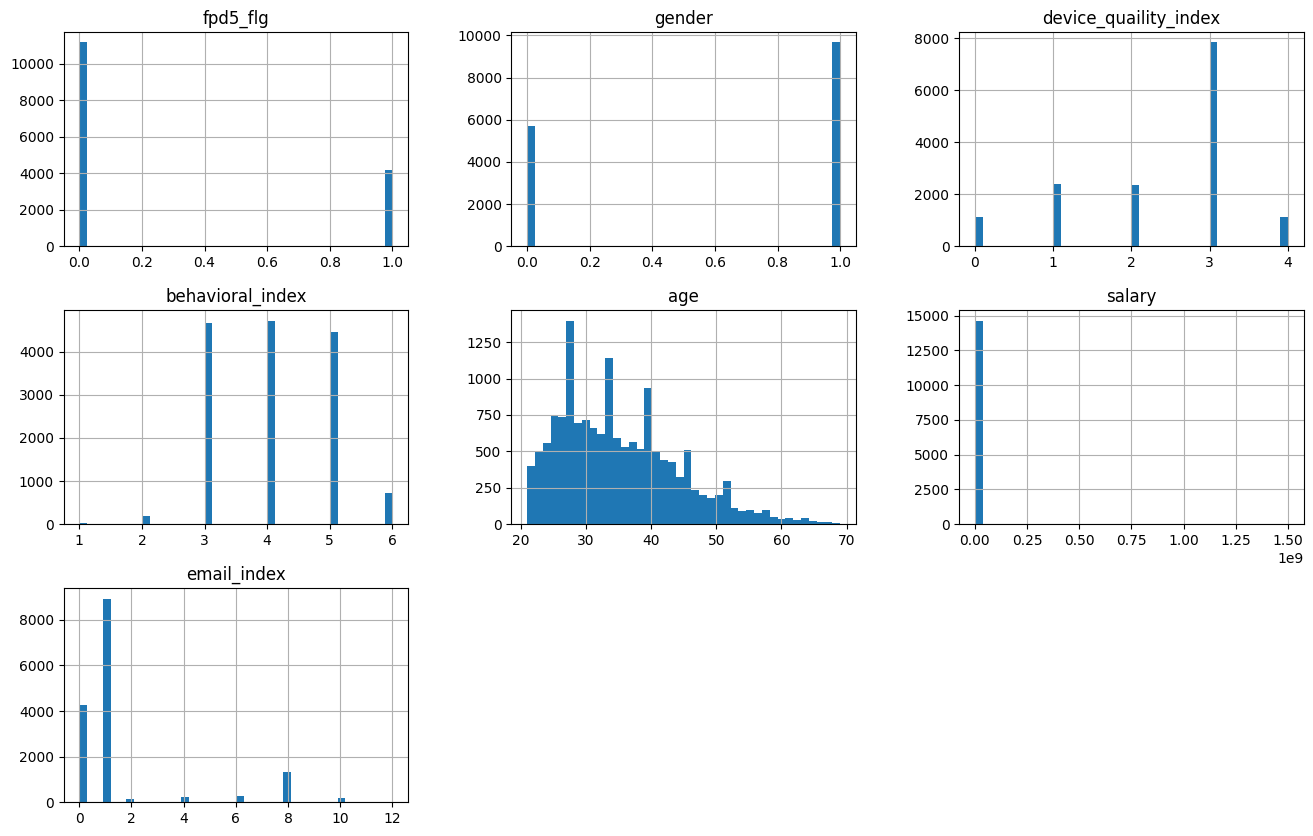

In [ ]:
df.hist(bins=40, layout=(3,3), figsize=(16,10));

В столбце salary есть выбросы.

In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
behavioral_index,,
1.0,23,0.043478
2.0,202,0.198020
3.0,4675,0.265027
4.0,4721,0.260538
5.0,4447,0.287385
6.0,730,0.324658
NaN,565,0.293805


<Axes: xlabel='behavioral_index'>

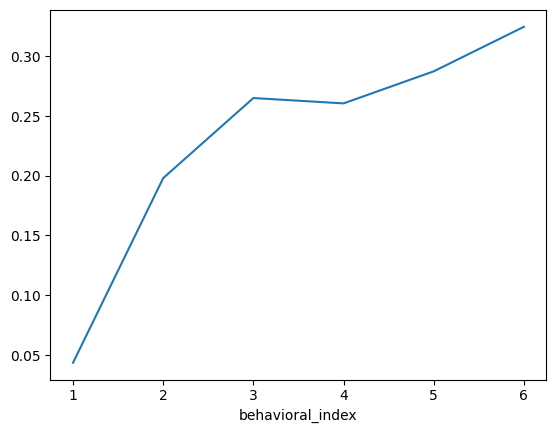

In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].mean().plot()

Чем выше behavioral_index, тем выше доля дефолта.

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
device_quaility_index,,
0.0,1122,0.330660
1.0,2374,0.291070
2.0,2337,0.307659
3.0,7837,0.257496
4.0,1128,0.200355
NaN,565,0.293805


<Axes: xlabel='device_quaility_index'>

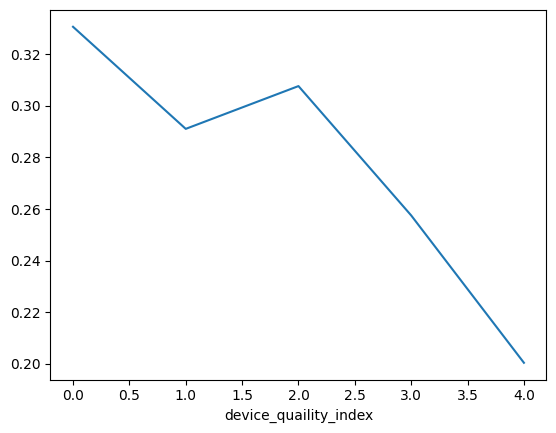

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].mean().plot()

Чем выше device_quaility_index, тем ниже доля дефолта.

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
type_of_document,,
Driver license ID,3073,0.277904
PRC,449,0.187082
Passport,1867,0.274772
SSS,1498,0.242991
TIN,3057,0.307164
UMID,5419,0.265178


<Axes: xlabel='type_of_document'>

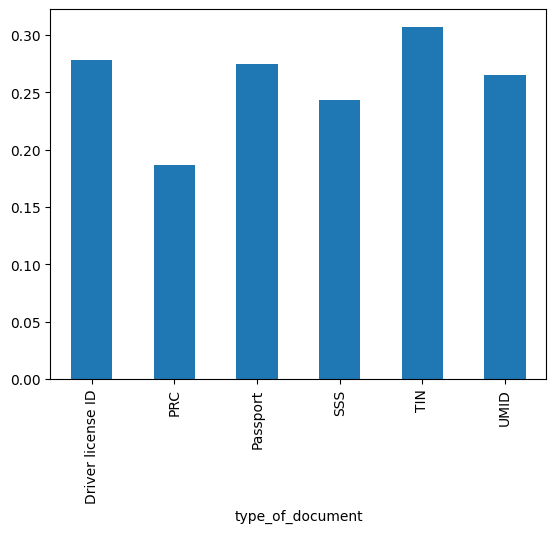

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].mean().plot(kind='bar')

In [ ]:
df.groupby('social_status',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
social_status,,
BPO Professionals,2295,0.272767
Business Owner,1680,0.284524
Financial Services,247,0.182186
Freelance,777,0.280566
Government Employee,1061,0.258247
Other,1703,0.276571
Private Company Employee,3500,0.264286
"Professional Worker (Doctors, Engineers, Accountants, etc.)",642,0.194704
Retail Worker,402,0.298507


<Axes: xlabel='social_status'>

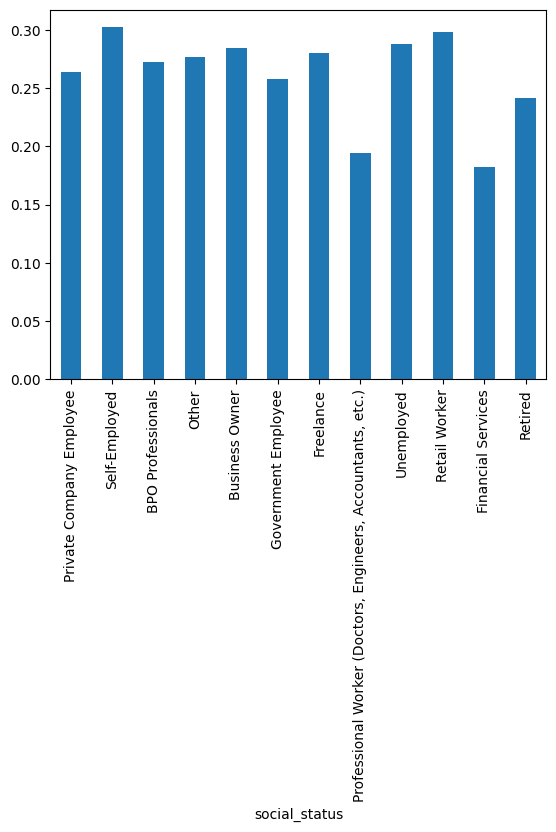

In [ ]:
df.groupby('social_status',dropna=False)['fpd5_flg'].agg(['count','mean']).sort_values('count',ascending=False)['mean'].plot(kind='bar')

In [ ]:
df.groupby('email_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
email_index,,
0.0,4253,0.236539
1.0,8926,0.281201
2.0,129,0.217054
3.0,7,0.285714
4.0,232,0.331897
6.0,273,0.296703
8.0,1329,0.314522
10.0,176,0.318182
11.0,1,0.000000


<Axes: xlabel='email_index'>

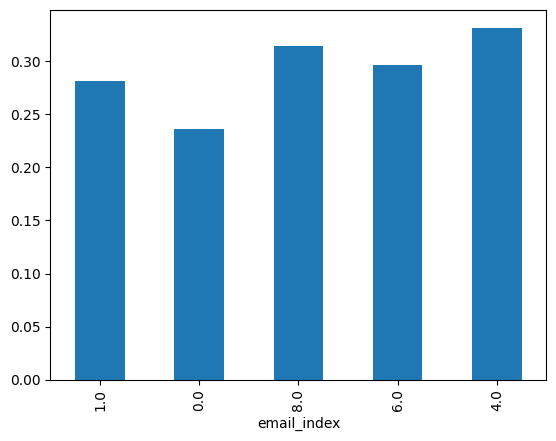

In [ ]:
df.groupby('email_index',dropna=False)['fpd5_flg'].agg(['count','mean']).sort_values('count',ascending=False)['mean'].head(5).plot(kind='bar')

In [ ]:
data = df.copy()

In [ ]:
data['salary_bin'] = pd.qcut(data['salary'],5)
data['age_bin'] = pd.qcut(data['age'],5)

In [ ]:
data.groupby('salary_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
salary_bin,,
"(-0.001, 14000.0]",3026,0.298083
"(14000.0, 18000.0]",3036,0.291173
"(18000.0, 22000.0]",2820,0.275532
"(22000.0, 30000.0]",3906,0.273682
"(30000.0, 1500020000.0]",1861,0.193982


<Axes: xlabel='salary_bin'>

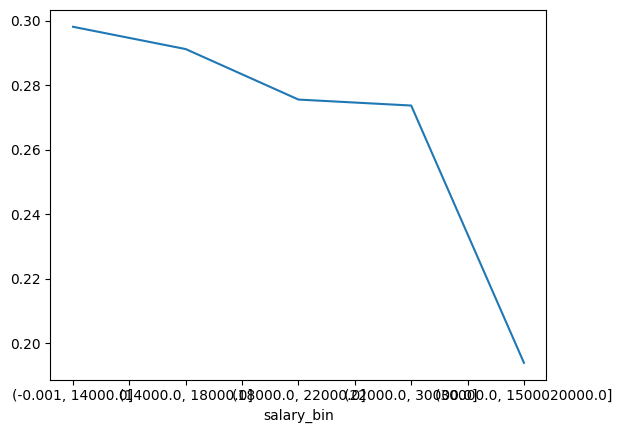

In [ ]:
data.groupby('salary_bin',dropna=False)['fpd5_flg'].mean().plot()

Чем выше зп, тем ниже доля дефолта.


In [ ]:
data.groupby('age_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
age_bin,,
"(20.999, 27.0]",3635,0.298212
"(27.0, 31.0]",2766,0.287419
"(31.0, 36.0]",2887,0.283685
"(36.0, 43.0]",3381,0.262053
"(43.0, 69.0]",2694,0.225316


<Axes: xlabel='age_bin'>

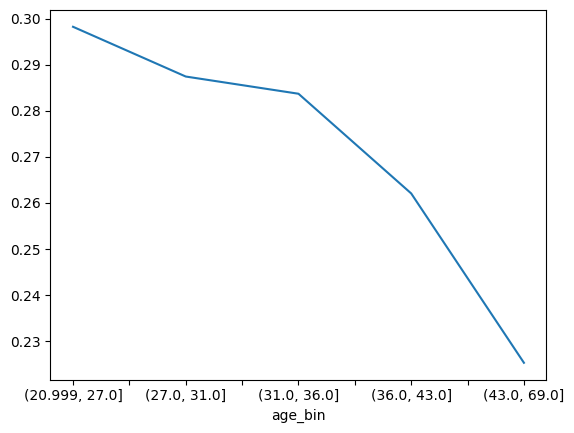

In [ ]:
data.groupby('age_bin',dropna=False)['fpd5_flg'].mean().plot()

Чем выше возраст, тем ниже доля дефолта у людей.

In [ ]:
df.groupby('disbursment_type',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
disbursment_type,,
Bank,8918,0.216192
E-wallet,6445,0.351125


In [ ]:
df.groupby('gender',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
gender,,
0,5698,0.307125
1,9665,0.252561


In [ ]:
df.describe()

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
count,15363.000000,15363.000000,14798.000000,14798.000000,15363.000000,1.464900e+04,15330.000000
mean,0.272798,0.629109,2.369982,4.051291,35.135781,1.261647e+05,1.580039
std,0.445412,0.483059,1.077686,0.937965,9.125229,1.239332e+07,2.397705
min,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,2.000000,3.000000,28.000000,1.500000e+04,0.000000
50%,0.000000,1.000000,3.000000,4.000000,34.000000,2.000000e+04,1.000000
75%,1.000000,1.000000,3.000000,5.000000,41.000000,2.600000e+04,1.000000
max,1.000000,1.000000,4.000000,6.000000,69.000000,1.500020e+09,12.000000


In [ ]:
df.describe(include = 'object')

,type_of_document,email_domain_formatted,social_status,disbursment_type,os
count,15363,15363,15363,15363,15347
unique,6,95,12,2,7
top,UMID,GMAIL.COM,Private Company Employee,Bank,Android
freq,5419,12109,3500,8918,11499


Посмотрим корреляцию

In [ ]:
df.corr(numeric_only = True)

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
fpd5_flg,1.000000,-0.059176,-0.063721,0.036196,-0.057321,-0.005169,0.042753
gender,-0.059176,1.000000,-0.072875,-0.021173,-0.002914,0.006323,-0.000178
device_quaility_index,-0.063721,-0.072875,1.000000,-0.030675,-0.229887,-0.010639,-0.076656
behavioral_index,0.036196,-0.021173,-0.030675,1.000000,-0.018614,0.008439,0.036294
age,-0.057321,-0.002914,-0.229887,-0.018614,1.000000,0.005681,0.086435
salary,-0.005169,0.006323,-0.010639,0.008439,0.005681,1.000000,-0.001994
email_index,0.042753,-0.000178,-0.076656,0.036294,0.086435,-0.001994,1.000000


<Axes: >

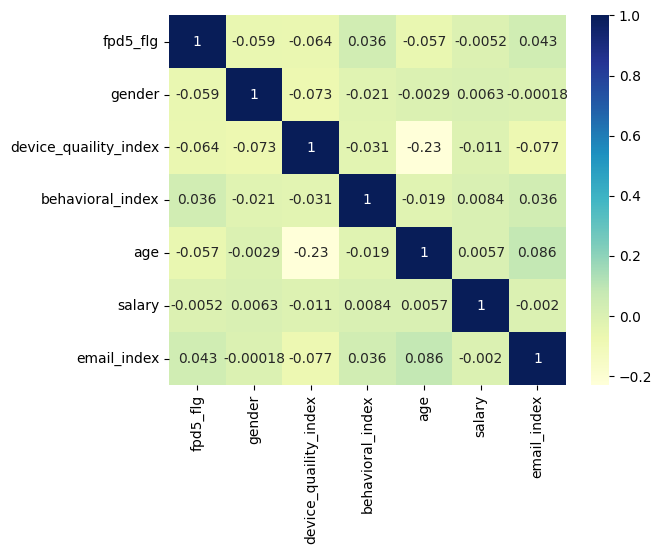

In [ ]:
sb.heatmap(df.corr(numeric_only = True), cmap="YlGnBu", annot=True)

Сильнее всех числовых переменных с целевой переменной fpd5_flg скоррелирована переменная device_quaility_index. Слабее всех - salary.

Также среди пар числовых признаков наиболее сильно скоррелированная пара - device_quaility_index и age.

phik - корреляция

In [ ]:
!pip install phik

In [ ]:
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['fpd5_flg', 'gender', 'device_quaility_index', 'behavioral_index', 'age', 'salary', 'email_index']


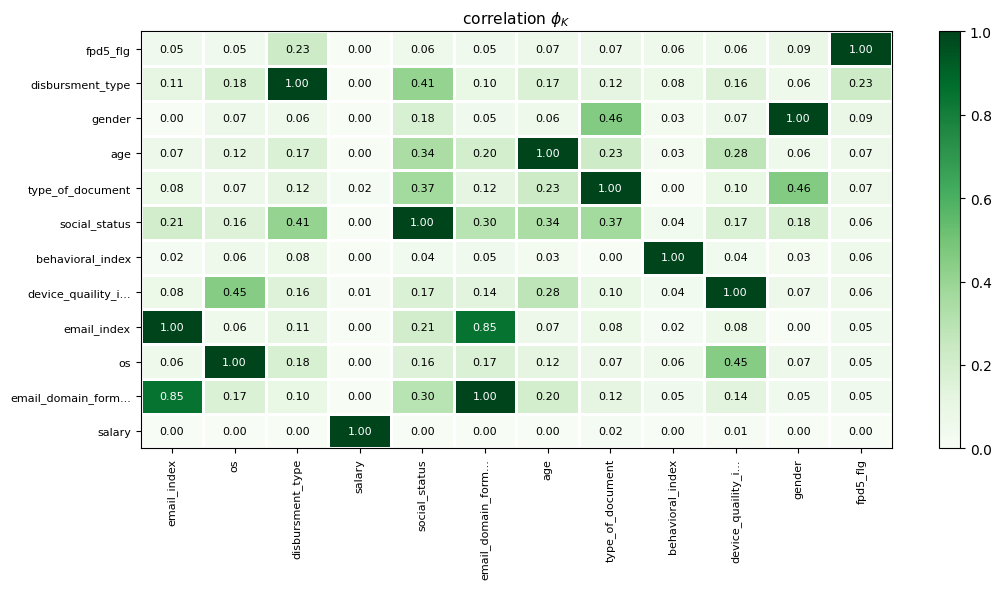

In [ ]:
phik_overview = df.phik_matrix().round(2).sort_values('fpd5_flg')

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

Судя по матрице корреляции phik, с целевой переменной больше всего коррелирует(в смысле phik - корреляции) признак disbursment_type. Вообще не коррелирует с целевой переменной признак salary.

Наиболее сильно скоррелированная пара признаков - email_domain_formatted и email_index.

Также видим, что призак salary почти не коррелирует с другими признаками.

Избавимся от выбросов

In [ ]:
Q1, Q3 = df['salary'].quantile([.25, .75])
IQR = Q3 - Q1
salary_lower = Q1 - 1.5*IQR
salary_upper = Q3 + 1.5*IQR

In [ ]:
rows_to_drop = df[
    (df['salary'] < salary_lower) | (df['salary'] > salary_upper)].index
df = df.drop(rows_to_drop)

Заполним пропуски

In [ ]:
median_num_features = ['salary']
most_freq_num_features = ['os','device_quaility_index','behavioral_index','email_index']

In [ ]:
df['salary'].median()

20000.0

In [ ]:
df['salary'] = df['salary'].fillna(df['salary'].median())

In [ ]:
for col in most_freq_num_features:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

fpd5_flg                  0
gender                    0
device_quaility_index     0
behavioral_index          0
type_of_document          0
age                       0
email_domain_formatted    0
social_status             0
salary                    0
disbursment_type          0
os                        0
email_index               0
dtype: int64

Закодируем бинарные категориальные признаки

In [ ]:
cat_cols

['type_of_document',
 'email_domain_formatted',
 'social_status',
 'disbursment_type',
 'os']

In [ ]:
binary_columns    = [col for col in cat_cols if df[col].nunique() == 2]
nonbinary_columns = [col for col in cat_cols if df[col].nunique() > 2]

In [ ]:
binary_columns

['disbursment_type']

In [ ]:
nonbinary_columns

['type_of_document', 'email_domain_formatted', 'social_status', 'os']

In [ ]:
df['disbursment_type'].value_counts()

Bank        8192
E-wallet    6212
Name: disbursment_type, dtype: int64

In [ ]:
df['disbursment_type'] = df['disbursment_type'].map({'Bank': 1, 'E-wallet':0})

Закодируем небинарные категориальные признаки one-hot кодированием

In [ ]:
df = pd.get_dummies(data = df,columns = nonbinary_columns, drop_first = True)

In [ ]:
df

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,disbursment_type,email_index,type_of_document_PRC,type_of_document_Passport,...,social_status_Retail Worker,social_status_Retired,social_status_Self-Employed,social_status_Unemployed,os_Chrome OS,os_Linux,os_OS X,os_Windows,os_iOS,os_macOS
0,0,0,3.0,4.0,26,20000.0,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3.0,4.0,32,18000.0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.0,3.0,41,14000.0,1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0.0,5.0,28,40000.0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,3.0,3.0,31,25000.0,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,1,3.0,5.0,36,25000.0,0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15359,1,1,0.0,3.0,32,25000.0,0,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0
15360,1,1,1.0,5.0,29,25000.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15361,0,1,1.0,5.0,37,25000.0,1,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols_to_norm = ['device_quaility_index','behavioral_index','age','salary','email_index']

In [ ]:
data_numerical = df[cols_to_norm]
data_numerical.describe()

,device_quaility_index,behavioral_index,age,salary,email_index
count,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000
mean,2.363024,4.055054,34.937934,19644.219245,1.597612
std,1.064886,0.920477,9.105523,8232.947074,2.412673
min,0.000000,1.000000,21.000000,0.000000,0.000000
25%,2.000000,3.000000,28.000000,15000.000000,0.000000
50%,3.000000,4.000000,33.000000,20000.000000,1.000000
75%,3.000000,5.000000,41.000000,25000.000000,1.000000
max,4.000000,6.000000,69.000000,42500.000000,12.000000


Проводим MinMax нормализацию, чтобы все переменные были в диапазоне от 0 до 1. Это необходимо, так как в дальнейшем мы будем использовать метод опорных векторов.

In [ ]:
data_numerical = (data_numerical - data_numerical.min(axis = 0))/(data_numerical.max(axis = 0) - data_numerical.min(axis = 0))

In [ ]:
df[cols_to_norm] = data_numerical

In [ ]:
df

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,disbursment_type,email_index,type_of_document_PRC,type_of_document_Passport,...,social_status_Retail Worker,social_status_Retired,social_status_Self-Employed,social_status_Unemployed,os_Chrome OS,os_Linux,os_OS X,os_Windows,os_iOS,os_macOS
0,0,0,0.75,0.6,0.104167,0.470588,1,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.75,0.6,0.229167,0.423529,0,0.083333,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.00,0.4,0.416667,0.329412,1,0.083333,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0.00,0.8,0.145833,0.941176,0,0.083333,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0.75,0.4,0.208333,0.588235,1,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,1,0.75,0.8,0.312500,0.588235,0,0.500000,0,0,...,0,0,0,0,0,0,0,0,0,0
15359,1,1,0.00,0.4,0.229167,0.588235,0,0.083333,0,1,...,0,0,1,0,0,0,0,0,0,0
15360,1,1,0.25,0.8,0.166667,0.588235,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
15361,0,1,0.25,0.8,0.333333,0.588235,1,0.500000,0,0,...,0,0,0,0,0,0,0,0,0,0


X и y

In [ ]:
X = df.drop(columns = 'fpd5_flg')
y = df['fpd5_flg']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV

Запускаем метод опорных векторов, подбираем параметры с помощью GridSearch. Метод опорных векторов  строит гиперплоскость, разделяющую объекты выборки оптимальным способом, посредством максимизации минимального отступа. Эта гиперплоскость проходит на одинаковом удалении от обоих классов.

Ядровой метод опорных векторов позволяет строить нелинейные разделители.

In [ ]:
from sklearn.svm import SVC

In [ ]:
params = {'kernel' : ['rbf','poly','sigmoid','linear'],
          'C' : [1,2,3,4,5,6]
          }

In [ ]:
gs = GridSearchCV(SVC(), params, cv=10,scoring='roc_auc')
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='roc_auc')

In [ ]:
gs.best_estimator_.kernel

'poly'

In [ ]:
gs.best_estimator_.C

6

In [ ]:
svc = SVC(kernel = gs.best_estimator_.kernel, C = gs.best_estimator_.C).fit(X_train, y_train)

In [ ]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

err_train

0.26929180718111484

In [ ]:
err_test

0.28204534937528924

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
params = {
          'C' : [1, 2, 3, 4, 5, 6]
          }

In [ ]:
gs = GridSearchCV(LinearSVC(), params, cv=10,scoring='roc_auc')
gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=10, estimator=LinearSVC(), param_grid={'C': [1, 2, 3, 4, 5, 6]},
             scoring='roc_auc')

In [ ]:
svc = LinearSVC(C = gs.best_estimator_.C).fit(X_train, y_train)

In [ ]:
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train,err_test)

0.2774251140646697 0.2806571031929662


In [ ]:
gs.best_estimator_.C

1

Обычный метод опорных векторов на тестовой выборке показал ошибку меньшую, чем ядровой метод опорных векторов.